# Seattle AirBnB Data
In this notebook we will explore the publically available data for AirBnB listings in Seattle. We explore the dataset and try to answer the following questions throught the data

## Business Understanding:

#### Question 1:Which areas are expensive or more visited as compared to others?
#### Question 2:How does the price vary during the year, when should you visit if you want a cheaper price?
#### Question 3:What are the factors that influence price the most?

Lets import the data. As you can see the dataset has three sub datasets
##### Calender: This contains the price and availability of listings over the course of one year
##### Listings: This contains the information about the listing
##### Reviews: This table contains the reviews each listing has received

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
import helper_func as hf
%matplotlib inline

calender_df = pd.read_csv("data/calendar.csv")
listing_df = pd.read_csv("data/listings.csv")

I didn't load the reviews table as I will not be using it

# Data Exploration

In [2]:
print(calender_df.shape)
print(listing_df.shape)

(1393570, 4)
(3818, 92)


As you can see we have total 3818 listings lets explore this dataset more

In [3]:
listing_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [4]:
calender_df.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [5]:
listing_df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [6]:
listing_df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [7]:
calender_df.columns

Index(['listing_id', 'date', 'available', 'price'], dtype='object')

In [8]:
calender_df.describe()

,listing_id
count,1.393570e+06
mean,5.550111e+06
std,2.962274e+06
min,3.335000e+03
25%,3.258213e+06
50%,6.118244e+06
75%,8.035212e+06
max,1.034016e+07


# Data Cleaning

Lets clean the listings table. I have selected some columns that I will be working on

In [9]:
cleansed_listings_df = listing_df[['host_response_rate',
                             'host_acceptance_rate',
                             'host_is_superhost',
                             'host_identity_verified',
                             'is_location_exact',
                             'accommodates',
                             'bathrooms',
                             'bedrooms',
                             'beds',
                             'square_feet',
                             'price',
                             'number_of_reviews',
                             'review_scores_rating',
                             'instant_bookable',
                             'calculated_host_listings_count',
                             'reviews_per_month']]

Lets check for missing values in the data

In [10]:
 cleansed_listings_df.isnull().sum().sort_values(ascending=False) * 100 / len(listing_df)

square_feet                       97.459403
host_acceptance_rate              20.246202
review_scores_rating              16.946045
reviews_per_month                 16.422211
host_response_rate                13.698271
bathrooms                          0.419068
bedrooms                           0.157150
host_is_superhost                  0.052383
host_identity_verified             0.052383
beds                               0.026192
is_location_exact                  0.000000
accommodates                       0.000000
price                              0.000000
number_of_reviews                  0.000000
instant_bookable                   0.000000
calculated_host_listings_count     0.000000
dtype: float64

After reviewing the columns I have shortlisted the following to see their affect on price. Replace the true/false columns with 1/0 and remove the percentage sign from 'host_acceptance_rate','host_response_rate'. Also lets remove the $ sign from the price column
Further lets check for missing values

In [11]:
cleansed_listings_df = hf.clean_listing_df(cleansed_listings_df)

We can also see how mnay unique values does each column hold to get more information about what we are dealing with

In [12]:
cleansed_listings_df.nunique(axis=0).sort_values(ascending=True)

host_acceptance_rate                2
host_is_superhost                   2
host_identity_verified              2
is_location_exact                   2
instant_bookable                    2
bedrooms                            8
beds                               11
bathrooms                          12
accommodates                       15
calculated_host_listings_count     18
review_scores_rating               42
host_response_rate                 45
square_feet                        47
number_of_reviews                 195
price                             273
reviews_per_month                 654
dtype: int64

In [13]:
cleansed_listings_df.describe()

,host_response_rate,host_acceptance_rate,host_is_superhost,host_identity_verified,is_location_exact,accommodates,bathrooms,bedrooms,beds,square_feet,price,number_of_reviews,review_scores_rating,instant_bookable,calculated_host_listings_count,reviews_per_month
count,3295.000000,3045.000000,3816.000000,3816.000000,3818.000000,3818.000000,3802.000000,3812.000000,3817.000000,97.000000,3818.000000,3818.000000,3171.000000,3818.000000,3818.000000,3191.000000
mean,94.886798,99.967159,0.203878,0.785377,0.893662,3.349398,1.259469,1.307712,1.735394,854.618557,127.976166,22.223415,94.539262,0.154793,2.946307,2.078919
std,11.866705,1.812201,0.402932,0.410614,0.308311,1.977599,0.590369,0.883395,1.139480,671.404893,90.250022,37.730892,6.606083,0.361755,5.893029,1.822348
min,17.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,20.000000,0.000000,20.000000,0.000000,1.000000,0.020000
25%,98.000000,100.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,420.000000,75.000000,2.000000,93.000000,0.000000,1.000000,0.695000
50%,100.000000,100.000000,0.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,750.000000,100.000000,9.000000,96.000000,0.000000,1.000000,1.540000
75%,100.000000,100.000000,0.000000,1.000000,1.000000,4.000000,1.000000,2.000000,2.000000,1200.000000,150.000000,26.000000,99.000000,0.000000,2.000000,3.000000
max,100.000000,100.000000,1.000000,1.000000,1.000000,16.000000,8.000000,7.000000,15.000000,3000.000000,1000.000000,474.000000,100.000000,1.000000,37.000000,12.150000


We can drop the square_feet column as it has too many missing values.
We can fill the columns, 'host_is_superhost' ,'host_identity_verified' with the mode
And these columns we can fill with the mean; 'host_acceptance_rate', 'host_response_rate', 'review_scores_rating' , 'reviews_per_month'

For bathroom, bedrooms and beds lets replace the missing values wiht zero that way we can penalize it a listing as it has information missing

In [14]:
# Drop the square_feet column as it has too many missing values
cleansed_listings_df.drop(columns=['square_feet'], inplace=True)
mode_cols = ['host_is_superhost', 'host_identity_verified']
mean_cols = ['host_acceptance_rate', 'host_response_rate', 'review_scores_rating' , 'reviews_per_month']

# for bathroom, bedrooms and beds lets replace the missing values wiht zero that way we can penalize it a listing as it has information missing

zero_cols = ['bathrooms', 'bedrooms', 'beds']

cleansed_listings_df[mode_cols]=cleansed_listings_df[mode_cols].fillna(cleansed_listings_df.mode().iloc[0])
cleansed_listings_df[mean_cols]=cleansed_listings_df[mean_cols].fillna(cleansed_listings_df.mean().iloc[0])
cleansed_listings_df[zero_cols]=cleansed_listings_df[zero_cols].fillna(0)

Next, lets change the data type of columns with 2 unique values to int and we can also drop the any columns which donot hold more than 2 unique values as it will not help us in our analysis

In [15]:
cleansed_listings_df = hf.clean_dtype(cleansed_listings_df)

In [16]:
# Lets just check the datatypes to be safe
cleansed_listings_df.dtypes

host_response_rate                float64
host_acceptance_rate              float64
host_is_superhost                   int32
host_identity_verified              int32
is_location_exact                   int32
accommodates                        int64
bathrooms                         float64
bedrooms                          float64
beds                              float64
price                             float64
number_of_reviews                   int64
review_scores_rating              float64
instant_bookable                    int32
calculated_host_listings_count      int64
reviews_per_month                 float64
dtype: object

In [17]:
cleansed_listings_df.head()

,host_response_rate,host_acceptance_rate,host_is_superhost,host_identity_verified,is_location_exact,accommodates,bathrooms,bedrooms,beds,price,number_of_reviews,review_scores_rating,instant_bookable,calculated_host_listings_count,reviews_per_month
0,96.000000,100.000000,0,1,1,4,1.0,1.0,1.0,85.0,207,95.000000,0,2,4.070000
1,98.000000,100.000000,1,1,1,4,1.0,1.0,1.0,150.0,43,96.000000,0,6,1.480000
2,67.000000,100.000000,0,1,1,11,4.5,5.0,7.0,975.0,20,97.000000,0,2,1.150000
3,94.886798,94.886798,0,1,1,3,1.0,0.0,2.0,100.0,0,94.886798,0,1,94.886798
4,100.000000,94.886798,0,1,1,6,2.0,3.0,3.0,450.0,38,92.000000,0,1,0.890000


Next lets clean the calender table. First lets check the missing values

In [18]:
calender_df.isnull().sum().sort_values(ascending=False) * 100 / len(calender_df)

price         32.938998
listing_id     0.000000
date           0.000000
available      0.000000
dtype: float64

We can replace the missing values in the price column by 0 and also replace the 't' and 'f' by 1 and 0

In [19]:
calender_df = calender_df.replace({"t": 1, "f": 0})
calender_df.fillna(0, inplace=True)

Remove the dollar sign and make a new column for 'year_month'

In [20]:
calender_df['price'] = calender_df['price'].str.replace('[^0-9.]+','', regex=True).astype(float)

calender_df['year_month'] = calender_df['date'].str.split('-').str[0:2].apply('-'.join)

In [21]:
calender_df.describe()

,listing_id,available,price
count,1.393570e+06,1.393570e+06,934542.000000
mean,5.550111e+06,6.706100e-01,137.944859
std,2.962274e+06,4.699919e-01,105.062870
min,3.335000e+03,0.000000e+00,10.000000
25%,3.258213e+06,0.000000e+00,75.000000
50%,6.118244e+06,1.000000e+00,109.000000
75%,8.035212e+06,1.000000e+00,160.000000
max,1.034016e+07,1.000000e+00,1650.000000


# Data Modelling

Get our features in one data frame and the the value to be predicted in another

In [22]:
X = cleansed_listings_df.drop(['price'], axis=1)
y = cleansed_listings_df['price']

Next we are going to split into t|est and train sets and intialize and train a linear regressor. We are going to normalize our features as it is always a good idea to transform them into the same scale

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30) 

lm_model, test_score, train_score = hf.fit_linear_model(X_train, X_test, y_train, y_test)

print("Test Score: " + str(test_score))
print("Train Score: " + str(train_score))

Test Score: 0.40935572013022437
Train Score: 0.525987634863643


As we can see from above results linear regression is not performing well enough to derive any results from it. Next we can try Random Forest Regressor and see how it works

In [24]:
from sklearn.preprocessing import StandardScaler 
from sklearn.ensemble import RandomForestRegressor

rfr, train_score_r2, test_score_r2,train_score_mse, test_score_mse = hf.fit_random_forest(X_train, X_test, y_train, y_test)

Random Forest MSE train: 673.289, test: 4121.201
Random Forest R^2 train: 0.922, test: 0.416


This model is still not very good but lets keep it

## Question 1

Which areas are expensive or more visited as compared to others?

To answer this question lets plot the mean price for each neighbourhood and see the results

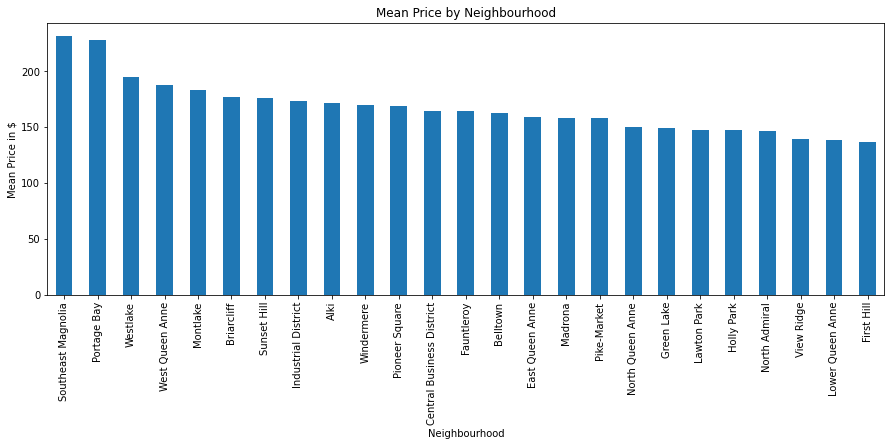

In [25]:
# Removing the dollar sign and coverting to float
listing_df['price'] = listing_df['price'].str.replace('[^0-9.]+','', regex=True).astype(float)
nh_price = hf.groupby_plot(listing_df,['neighbourhood_cleansed'],'price', title='Mean Price by Neighbourhood',
                      ylab='Mean Price in $', xlab='Neighbourhood', top_n=25)

As we can see the most expensive neighbourhoods are **Southeast Magnolia** and **Portage Bay**    

Now lets see which areas are visited the most. We can see this by averaging the number of reviews per month for each area. Higher average means more people visiting

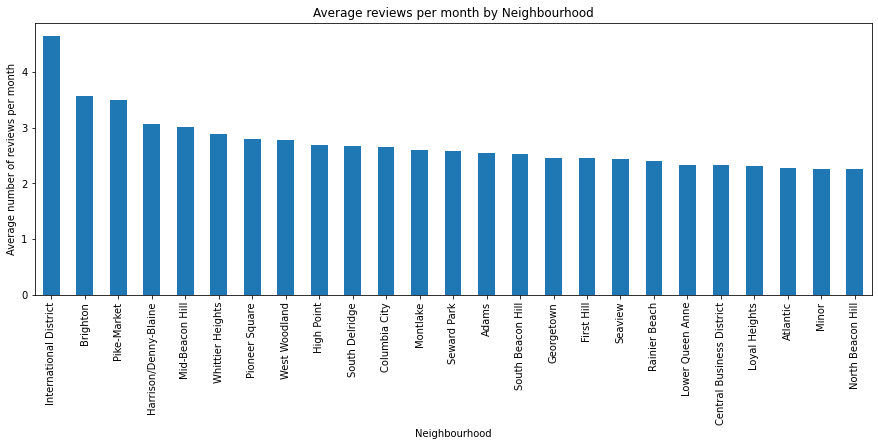

In [26]:
nh_pop = hf.groupby_plot(listing_df,['neighbourhood_cleansed'],'reviews_per_month', title='Average reviews per month by Neighbourhood',
                      ylab='Average number of reviews per month', xlab='Neighbourhood', top_n=25)

As you can see **International District** is the most popular neighbourhood followed by **Brighton**, **Pike-Market**, **Harrison/Denny-Blaine**, **Mid-Beacon Hill**

# Qestion 2

How does the price vary during the year, when should you visit if you want a cheaper price?

Next lets extract feature importance to check which features affects the price most

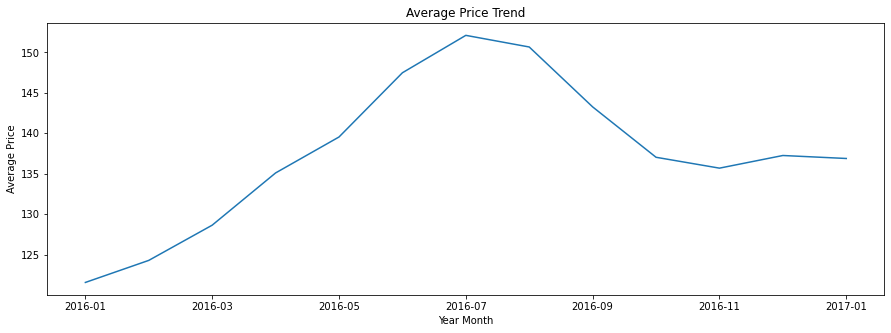

In [27]:
av_price_trend = hf.groupby_plot(calender_df,['year_month'],'price',plot_type='line', title='Average Price Trend',
                      ylab='Average Price', xlab='Year Month')

As we can see the price is the high in the **summer** and the highest in **July**

Also around the **holidays** we can see the prices are high as compared to other months

# Question 3

What are the factors that influence price the most?

Lets get the feature importance from our model

In [28]:
coefs_df = pd.DataFrame()
coefs_df['Feature'] = X.columns
coefs_df['Co-efficients'] = rfr.feature_importances_
coefs_df = coefs_df.sort_values('Co-efficients', ascending=False)
coefs_df.head()

,Feature,Co-efficients
7,bedrooms,0.396499
5,accommodates,0.126733
6,bathrooms,0.113380
13,reviews_per_month,0.109166
9,number_of_reviews,0.053111


Lets plot and analyze them

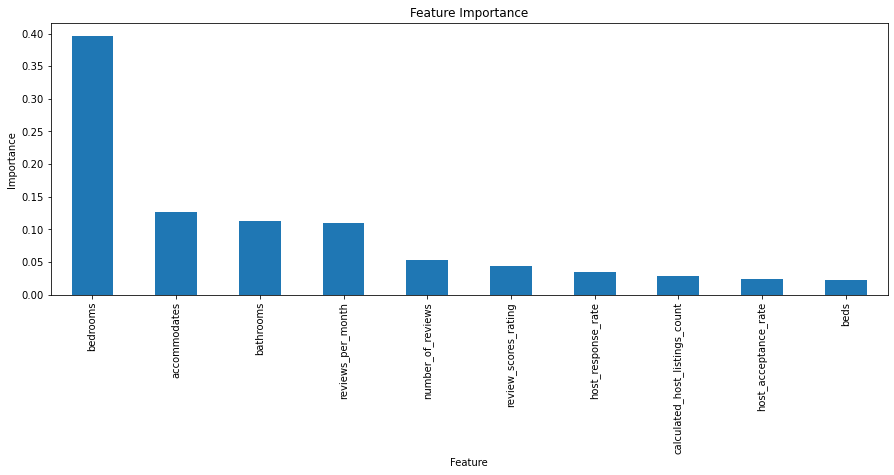

In [29]:
coef_imp = hf.groupby_plot(coefs_df,['Feature'],'Co-efficients',plot_type='bar', title='Feature Importance',
                      ylab='Importance', xlab='Feature')

As expected the number of **bedrooms** affects the price most because a bigger place will of course cost more. Further more **number of people** that can stay also raises the price. 

We can also see that more reviews means higher price so popular listings are more expensive

# Summary:

So, if you are planning to visit Seattle there are a number of things you could keep in mind. Summer is a great time to visit because rentals will be available and you will get a chance to bump into fellow travelers. International District would be a great place to stay owing to its popularity. To save money, it would be smart to rent a small space. It wouldn’t be smart to go in the winters because availability will be low, despite the low prices.